In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import fm2p
import os
from tqdm import tqdm

Loading DLC 2.3.7...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


c:\Users\dmartins\anaconda3\envs\fm1\lib\site-packages\oasis\functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [3]:
fm1_dir = r'K:\Mini2P\250304_DMM_DMM042_pillar\fm1\suite2p\plane0'
fm3_dir = r'K:\Mini2P\250304_DMM_DMM042_pillar\fm3\suite2p\plane0'

In [4]:
ops1 = np.load(os.path.join(fm1_dir, 'ops.npy'), allow_pickle=True)
ops3 = np.load(os.path.join(fm3_dir, 'ops.npy'), allow_pickle=True)

In [61]:
stat1 = np.load(os.path.join(fm1_dir, 'stat.npy'), allow_pickle=True)
stat3 = np.load(os.path.join(fm3_dir, 'stat.npy'), allow_pickle=True)

In [24]:
F1 = np.load(os.path.join(fm1_dir, 'F.npy'))
Fneu1 = np.load(os.path.join(fm1_dir, 'Fneu.npy'))
F3 = np.load(os.path.join(fm3_dir, 'F.npy'))
Fneu3 = np.load(os.path.join(fm3_dir, 'Fneu.npy'))

In [5]:
from matplotlib.gridspec import GridSpec

In [26]:
twop_dt1 = 1./7.49
twop_dt3 = 1./14.38
twopT1 = np.arange(0, np.size(F1, 1)*twop_dt1, twop_dt1)
twopT3 = np.arange(0, np.size(F3, 1)*twop_dt3, twop_dt3)

In [34]:
ops1.item().keys()

dict_keys(['suite2p_version', 'look_one_level_down', 'fast_disk', 'delete_bin', 'mesoscan', 'bruker', 'bruker_bidirectional', 'h5py', 'h5py_key', 'nwb_file', 'nwb_driver', 'nwb_series', 'save_path0', 'save_folder', 'subfolders', 'move_bin', 'nplanes', 'nchannels', 'functional_chan', 'tau', 'fs', 'force_sktiff', 'frames_include', 'multiplane_parallel', 'ignore_flyback', 'preclassify', 'save_mat', 'save_NWB', 'combined', 'aspect', 'do_bidiphase', 'bidiphase', 'bidi_corrected', 'do_registration', 'two_step_registration', 'keep_movie_raw', 'nimg_init', 'batch_size', 'maxregshift', 'align_by_chan', 'reg_tif', 'reg_tif_chan2', 'subpixel', 'smooth_sigma_time', 'smooth_sigma', 'th_badframes', 'norm_frames', 'force_refImg', 'pad_fft', 'nonrigid', 'block_size', 'snr_thresh', 'maxregshiftNR', '1Preg', 'spatial_hp_reg', 'pre_smooth', 'spatial_taper', 'roidetect', 'spikedetect', 'sparse_mode', 'spatial_scale', 'connected', 'nbinned', 'max_iterations', 'threshold_scaling', 'max_overlap', 'high_pass'

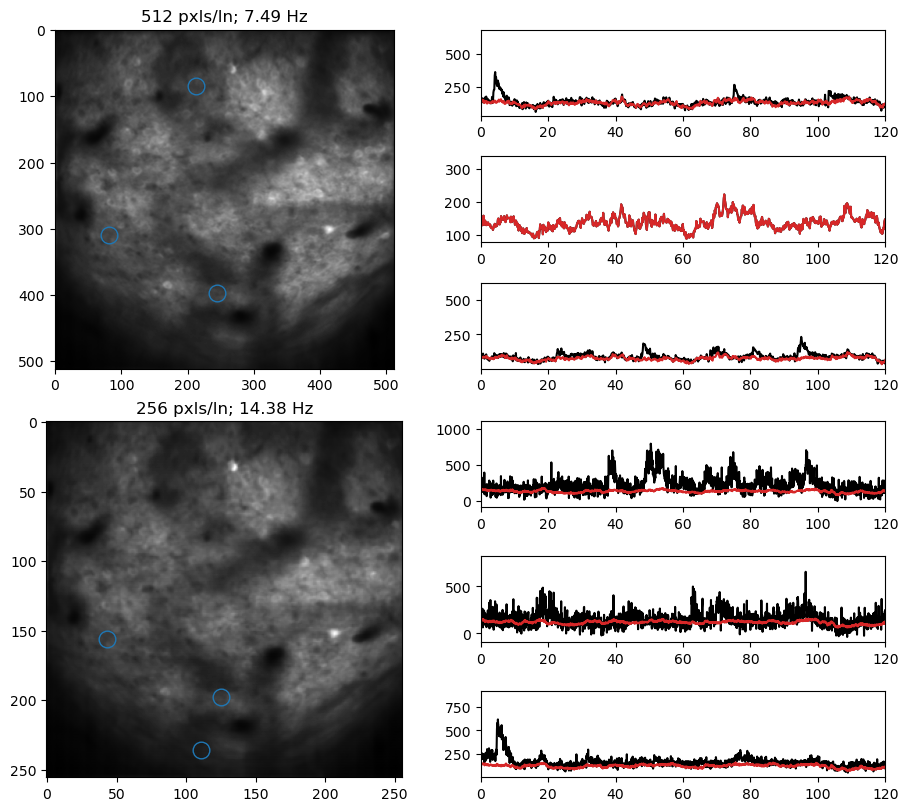

In [78]:
fig = plt.figure(figsize=(9,8), layout='constrained')
gs = GridSpec(6,2, figure=fig)
ax1 = fig.add_subplot(gs[0:3,0])
ax1a = fig.add_subplot(gs[0,1])
ax1b = fig.add_subplot(gs[1,1])
ax1c = fig.add_subplot(gs[2,1])
ax2 = fig.add_subplot(gs[3:6,0])
ax2a = fig.add_subplot(gs[3,1])
ax2b = fig.add_subplot(gs[4,1])
ax2c = fig.add_subplot(gs[5,1])

fm1_cells = [0,1,8]
fm3_cells = [0,2,10]

ax1.imshow(ops1.item()['meanImg'], cmap='gray')
ax1.set_title('512 pxls/ln; 7.49 Hz')
ax1.plot(stat1[fm1_cells[0]]['med'][0], stat1[fm1_cells[0]]['med'][1], 'o', ms=12, mfc='none', color='tab:blue')
ax1.plot(stat1[fm1_cells[1]]['med'][0], stat1[fm1_cells[1]]['med'][1], 'o', ms=12, mfc='none', color='tab:blue')
ax1.plot(stat1[fm1_cells[2]]['med'][0], stat1[fm1_cells[2]]['med'][1], 'o', ms=12, mfc='none', color='tab:blue')

ax1a.plot(twopT1, F1[fm1_cells[0],:], color='k')
ax1a.plot(twopT1, Fneu1[fm1_cells[0],:], color='tab:red')
ax1a.set_xlim([0,120])

ax1b.plot(twopT1, Fneu1[fm1_cells[1],:], color='k')
ax1b.plot(twopT1, Fneu1[fm1_cells[1],:], color='tab:red')
ax1b.set_xlim([0,120])

ax1c.plot(twopT1, F1[fm1_cells[2],:], color='k')
ax1c.plot(twopT1, Fneu1[fm1_cells[2],:], color='tab:red')
ax1c.set_xlim([0,120])

ax2.imshow(ops3.item()['meanImg'], cmap='gray')
ax2.set_title('256 pxls/ln; 14.38 Hz')
ax2.plot(stat3[fm3_cells[0]]['med'][0], stat3[fm3_cells[0]]['med'][1], 'o', ms=12, mfc='none', color='tab:blue')
ax2.plot(stat3[fm3_cells[1]]['med'][0], stat3[fm3_cells[1]]['med'][1], 'o', ms=12, mfc='none', color='tab:blue') # == stat1's cell 1
ax2.plot(stat3[fm3_cells[2]]['med'][0], stat3[fm3_cells[2]]['med'][1], 'o', ms=12, mfc='none', color='tab:blue') # 

ax2a.plot(twopT3, F3[fm3_cells[0],:], color='k')
ax2a.plot(twopT3, Fneu3[fm3_cells[0],:], color='tab:red')
ax2a.set_xlim([0,120])

ax2b.plot(twopT3, F3[fm3_cells[1],:], color='k')
ax2b.plot(twopT3, Fneu3[fm3_cells[1],:], color='tab:red')
ax2b.set_xlim([0,120])

ax2c.plot(twopT3, F3[fm3_cells[2],:], color='k')
ax2c.plot(twopT3, Fneu3[fm3_cells[2],:], color='tab:red')
ax2c.set_xlim([0,120])

plt.show()